In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('out/experiment_results.csv')
data



,variant,acc,auprc,auroc,balanced_acc,f1,training_time
0,TNC-RNN-adf-0.2,0.792958,0.807670,0.954993,0.772472,0.784820,755.468
1,TNC-RNN-adf-0.2,0.784507,0.803652,0.956599,0.761626,0.772699,754.257
2,TNC-RNN-adf-0.2,0.788732,0.799293,0.954464,0.764232,0.781533,756.112
3,TNC-RNN-adf-0.2,0.801408,0.811250,0.958368,0.778412,0.795159,760.664
4,TNC-RNN-adf-0.2,0.774648,0.799878,0.953604,0.749700,0.762716,754.068
...,...,...,...,...,...,...,...
59,TNC-TS2Vec-sim-0.05,0.952113,0.979098,0.993803,0.963295,0.952062,112.930
60,TNC-TS2Vec-sim-0.05,0.945070,0.980017,0.993961,0.956862,0.944948,110.850
61,TNC-TS2Vec-sim-0.05,0.952113,0.979484,0.993914,0.961564,0.952068,111.607
62,TNC-TS2Vec-sim-0.05,0.938028,0.980536,0.993911,0.945038,0.937911,110.795


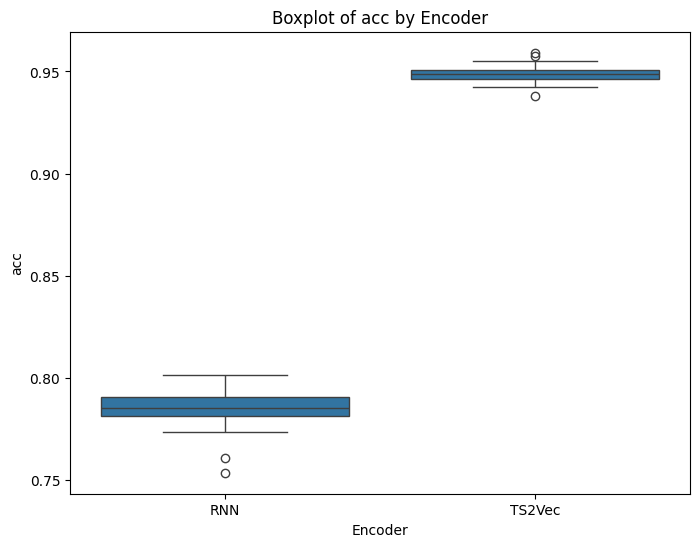

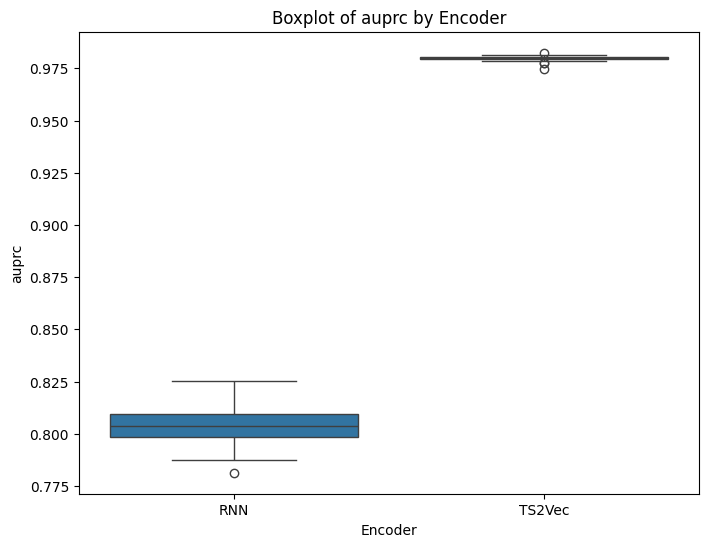

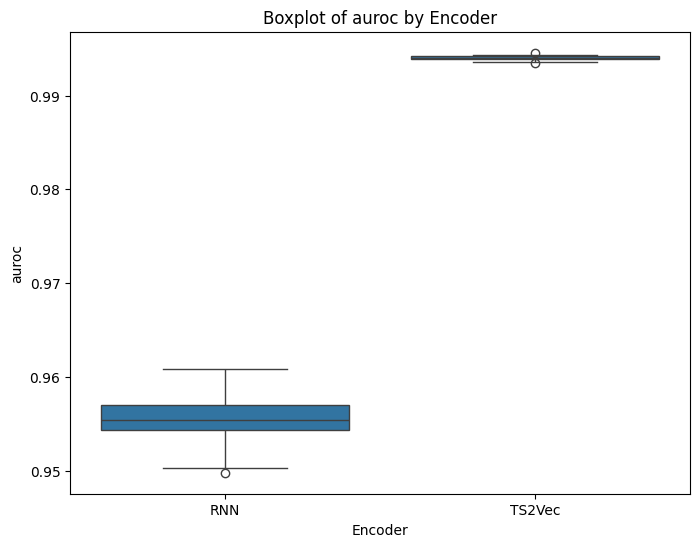

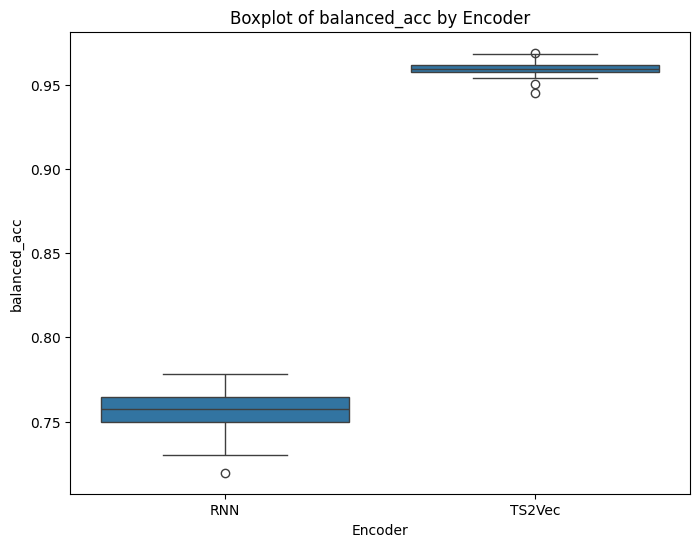

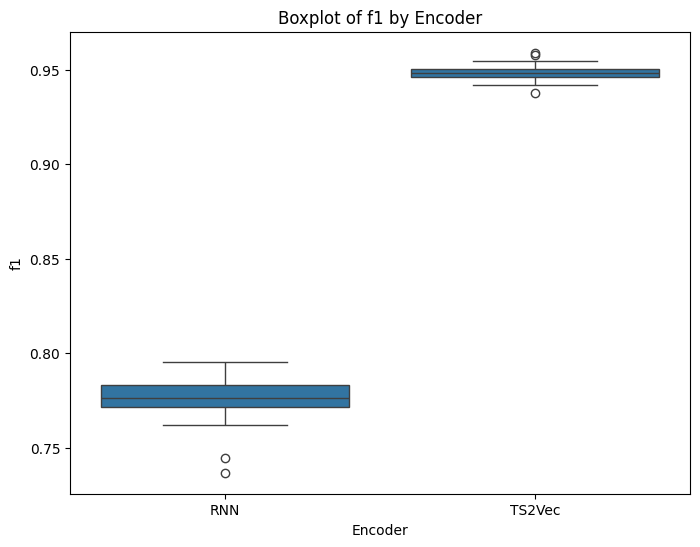

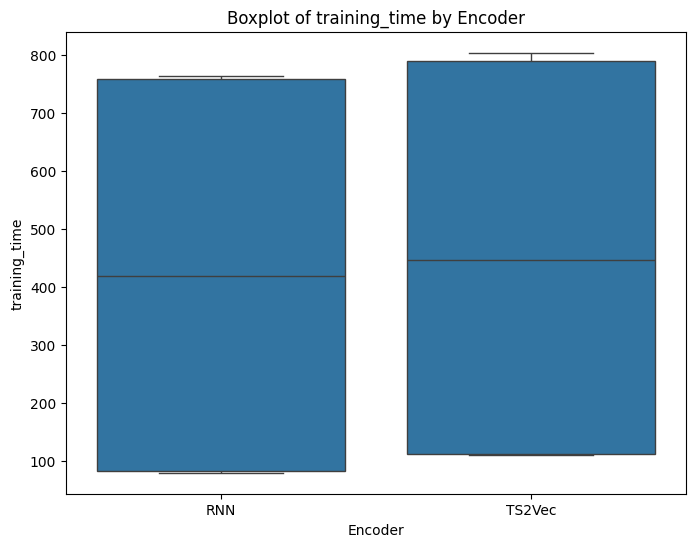

In [12]:

data_plot = pd.read_csv('out/experiment_results.csv')

# Extract encoder type (RNN or TS2Vec) from the variant column
data_plot['encoder'] = data_plot['variant'].str.extract(r'(RNN|TS2Vec)')

def create_boxplots(df, metrics):
    for metric in metrics:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='encoder', y=metric, data=df)
        plt.title(f'Boxplot of {metric} by Encoder')
        plt.xlabel('Encoder')
        plt.ylabel(metric)
        plt.show()

metrics = ['acc', 'auprc', 'auroc', 'balanced_acc', 'f1', 'training_time']

create_boxplots(data_plot, metrics)


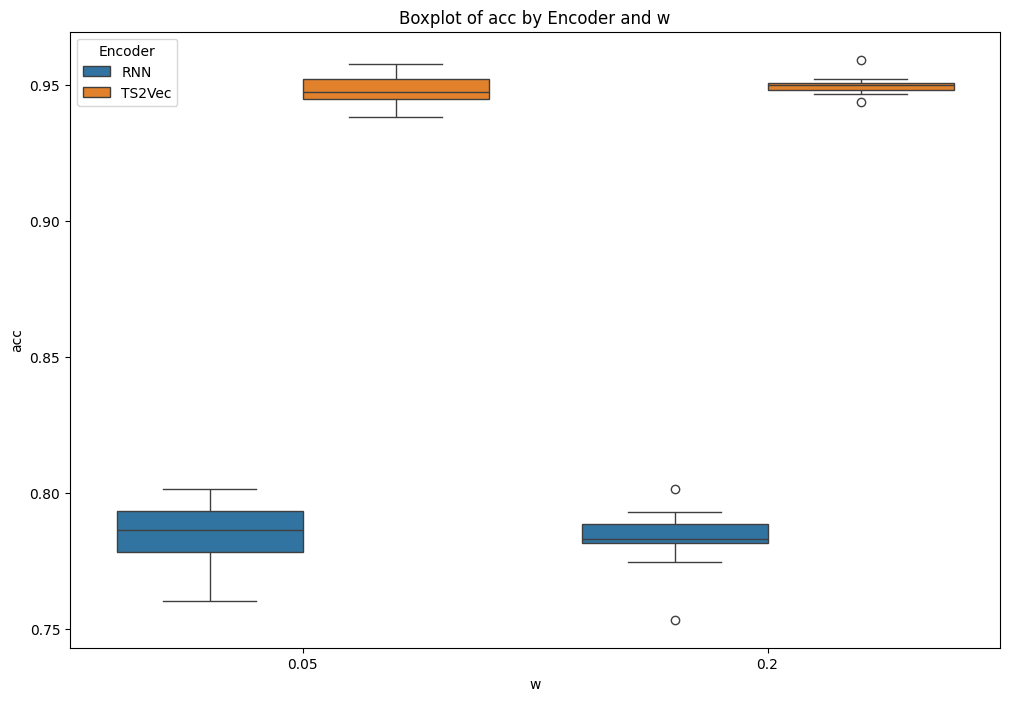

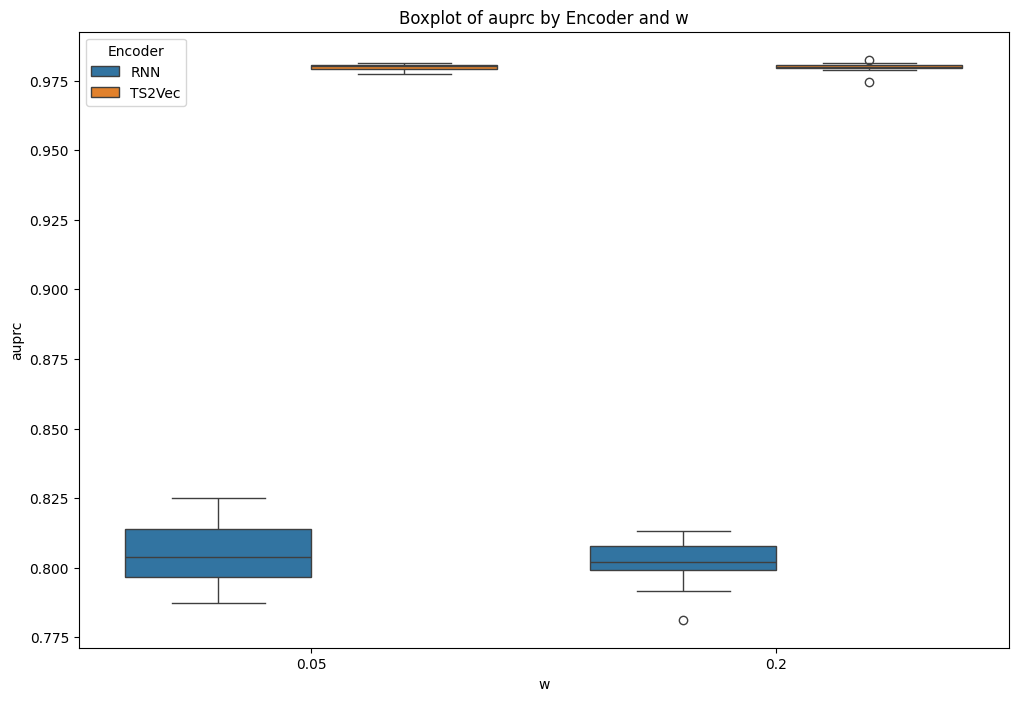

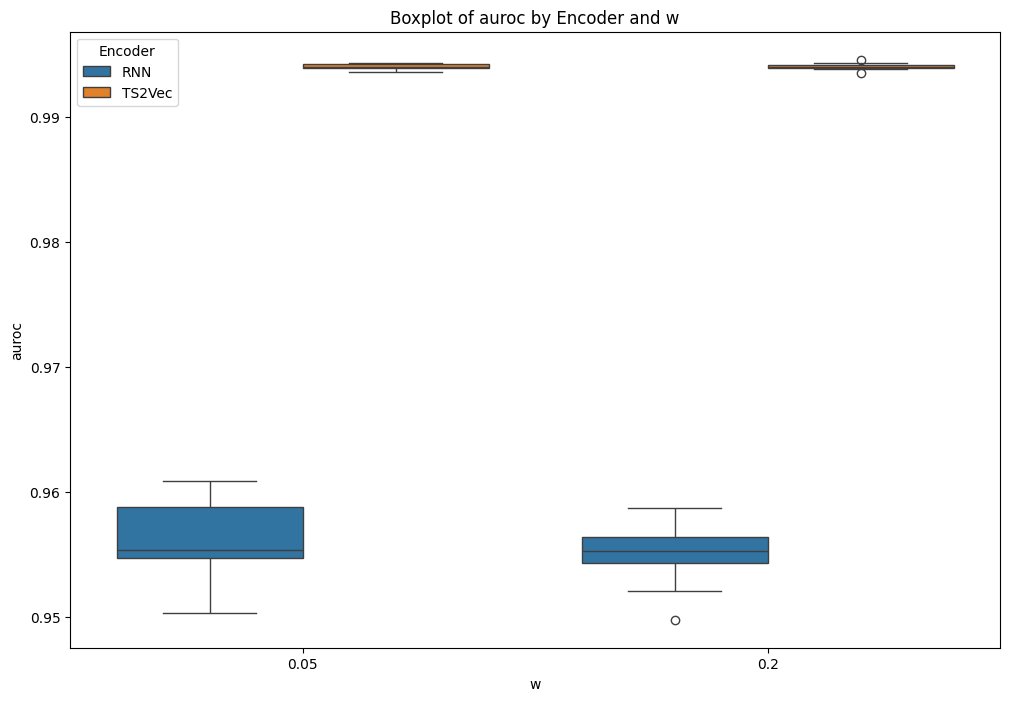

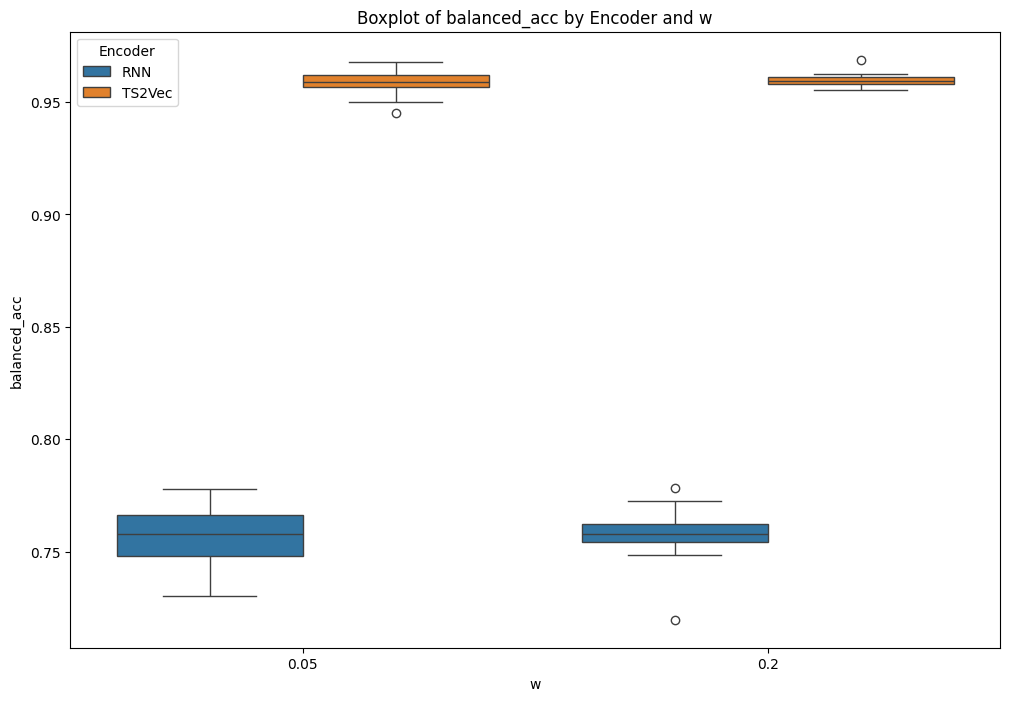

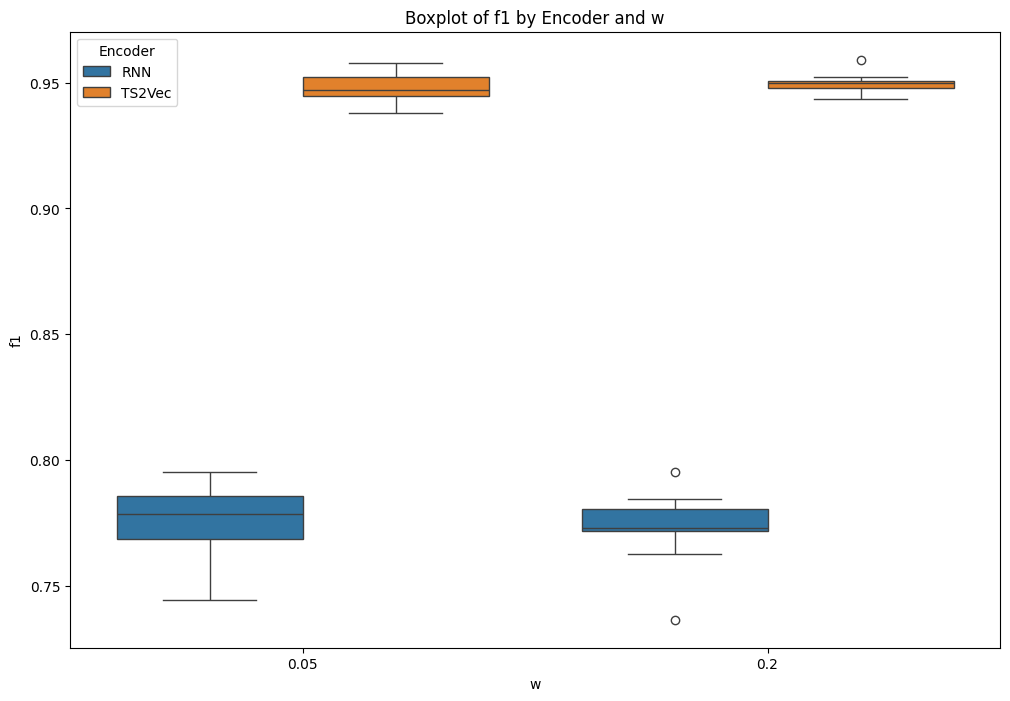

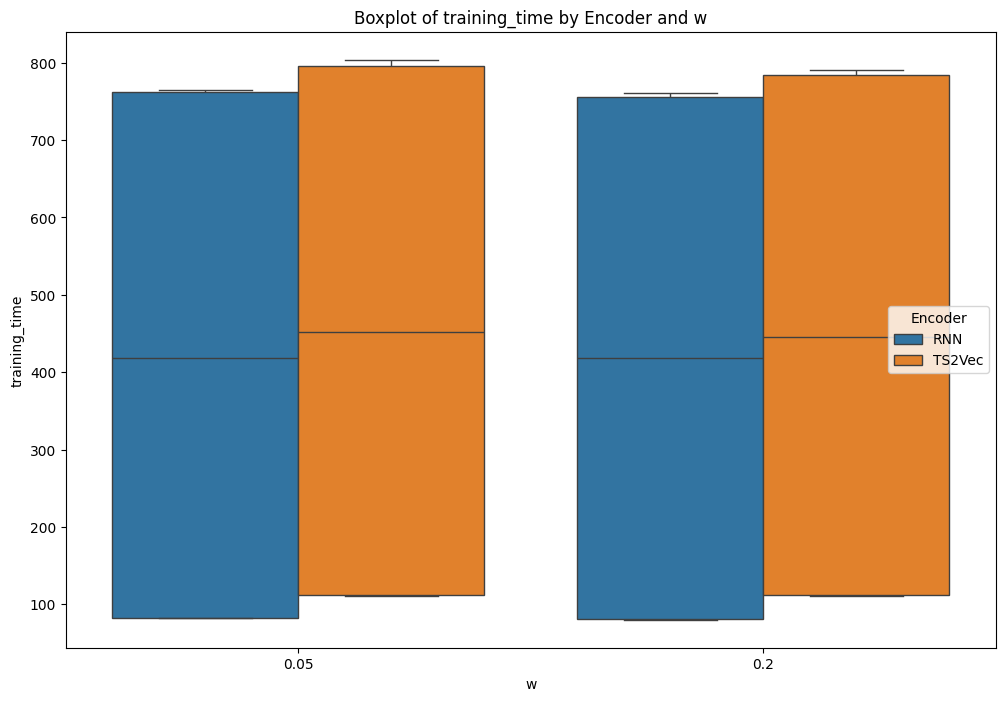

In [13]:

data_plot['w'] = data_plot['variant'].str.extract(r'(?:adf|sim)-(\d+\.\d+)').astype(float)


def create_boxplots(df, metrics):
    for metric in metrics:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='w', y=metric, hue='encoder', data=df)
        plt.title(f'Boxplot of {metric} by Encoder and w')
        plt.xlabel('w')
        plt.ylabel(metric)
        plt.legend(title='Encoder')
        plt.show()

metrics = ['acc', 'auprc', 'auroc', 'balanced_acc', 'f1', 'training_time']

create_boxplots(data_plot, metrics)


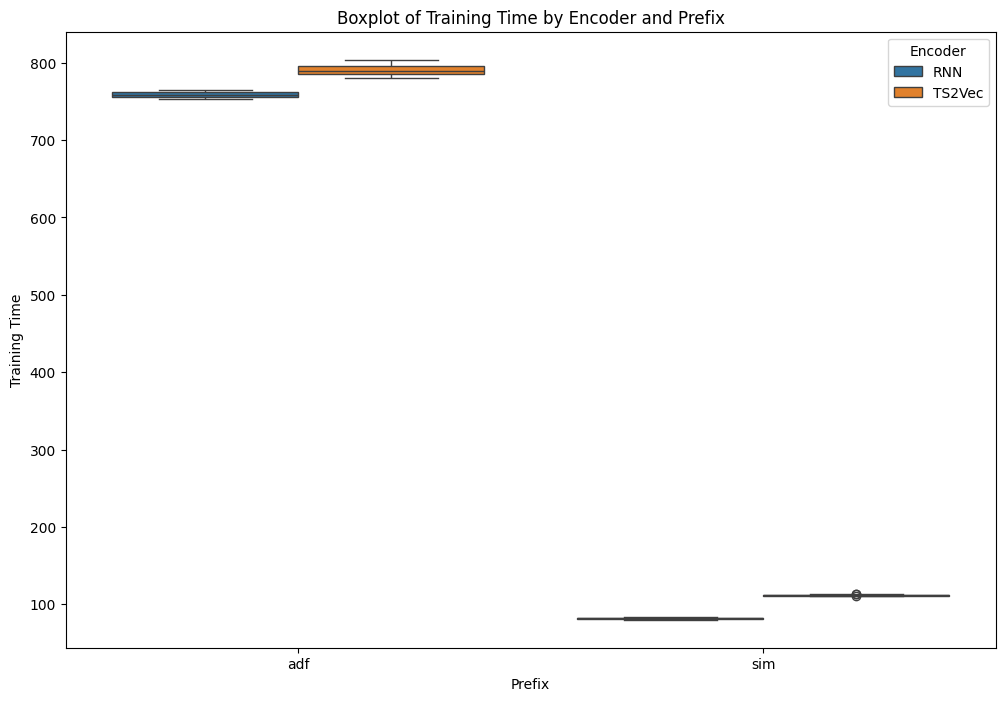

In [14]:

data_plot['prefix'] = data_plot['variant'].str.extract(r'(adf|sim)')

def create_training_time_boxplot(df):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='prefix', y='training_time', hue='encoder', data=df)
    plt.title('Boxplot of Training Time by Encoder and Prefix')
    plt.xlabel('Prefix')
    plt.ylabel('Training Time')
    plt.legend(title='Encoder')
    plt.show()

# Create the boxplot
create_training_time_boxplot(data_plot)


In [15]:
data

,variant,acc,auprc,auroc,balanced_acc,f1,training_time
0,TNC-RNN-adf-0.2,0.792958,0.807670,0.954993,0.772472,0.784820,755.468
1,TNC-RNN-adf-0.2,0.784507,0.803652,0.956599,0.761626,0.772699,754.257
2,TNC-RNN-adf-0.2,0.788732,0.799293,0.954464,0.764232,0.781533,756.112
3,TNC-RNN-adf-0.2,0.801408,0.811250,0.958368,0.778412,0.795159,760.664
4,TNC-RNN-adf-0.2,0.774648,0.799878,0.953604,0.749700,0.762716,754.068
...,...,...,...,...,...,...,...
59,TNC-TS2Vec-sim-0.05,0.952113,0.979098,0.993803,0.963295,0.952062,112.930
60,TNC-TS2Vec-sim-0.05,0.945070,0.980017,0.993961,0.956862,0.944948,110.850
61,TNC-TS2Vec-sim-0.05,0.952113,0.979484,0.993914,0.961564,0.952068,111.607
62,TNC-TS2Vec-sim-0.05,0.938028,0.980536,0.993911,0.945038,0.937911,110.795


In [16]:
df = pd.DataFrame(data)
numeric_columns = ['acc', 'auprc', 'auroc', 'balanced_acc', 'f1', 'training_time']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   variant        64 non-null     object 
 1   acc            64 non-null     float64
 2   auprc          64 non-null     float64
 3   auroc          64 non-null     float64
 4   balanced_acc   64 non-null     float64
 5   f1             64 non-null     float64
 6   training_time  64 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.6+ KB


In [17]:
grouped = df.groupby('variant').agg(['mean', 'std'])

In [18]:

# Group by 'variant' and calculate mean and standard deviation
grouped = df.groupby('variant').agg(['mean', 'std'])

# Convert mean and std to percentages (except training_time)
for col in grouped.columns.levels[0]:
    if col != 'training_time':
        grouped[(col, 'mean')] = grouped[(col, 'mean')] * 100
        grouped[(col, 'std')] = grouped[(col, 'std')] * 100

grouped = grouped.round(2)

# Flatten MultiIndex columns
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]

# Reset index to have 'variant' as a column
grouped = grouped.reset_index()
grouped

,variant,acc_mean,acc_std,auprc_mean,auprc_std,auroc_mean,auroc_std,balanced_acc_mean,balanced_acc_std,f1_mean,f1_std,training_time_mean,training_time_std
0,TNC-RNN-adf-0.05,78.75,0.99,80.83,1.00,95.69,0.30,75.87,1.30,77.94,1.12,760.61,3.77
1,TNC-RNN-adf-0.2,78.71,0.79,80.32,0.57,95.54,0.16,76.28,0.90,77.79,0.98,756.62,2.96
2,TNC-RNN-sim-0.05,78.38,1.16,80.18,1.21,95.51,0.33,75.59,1.53,77.41,1.43,82.81,0.57
3,TNC-RNN-sim-0.2,78.03,1.15,80.06,1.01,95.51,0.29,75.15,1.39,77.06,1.45,81.19,0.75
4,TNC-TS2Vec-adf-0.05,94.88,0.55,98.02,0.12,99.41,0.02,95.92,0.55,94.87,0.55,796.00,5.31
5,TNC-TS2Vec-adf-0.2,94.89,0.30,98.04,0.10,99.41,0.02,95.95,0.26,94.89,0.30,784.80,3.48
6,TNC-TS2Vec-sim-0.05,94.68,0.50,97.96,0.10,99.39,0.02,95.77,0.61,94.68,0.51,112.04,0.97
7,TNC-TS2Vec-sim-0.2,95.04,0.37,97.93,0.21,99.40,0.03,96.05,0.37,95.03,0.37,111.36,0.56



Normality test results for RNN:

Metric: acc
     Shapiro-Wilk Statistic   p-value
acc                0.928712  0.036062
Interpretation: p-value < 0.05. reject H0 
 data is not normally distributed.


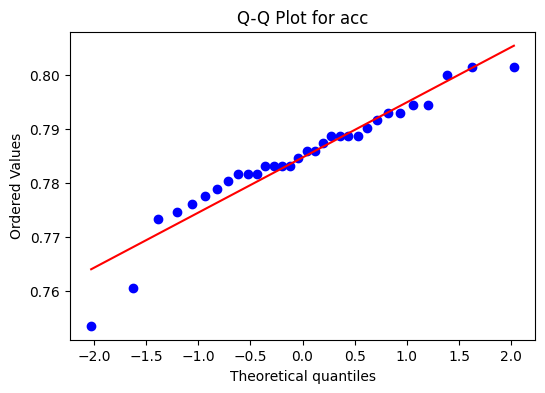


Metric: auprc
       Shapiro-Wilk Statistic   p-value
auprc                0.994354  0.999736
Interpretation: p-value >= 0.05. fail to reject H0 
 data is normally distributed.


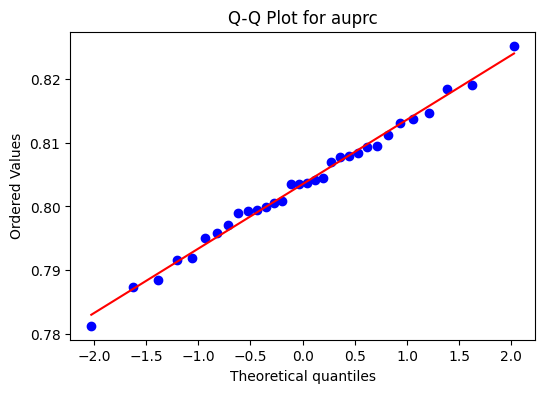


Metric: auroc
       Shapiro-Wilk Statistic   p-value
auroc                0.971165  0.532154
Interpretation: p-value >= 0.05. fail to reject H0 
 data is normally distributed.


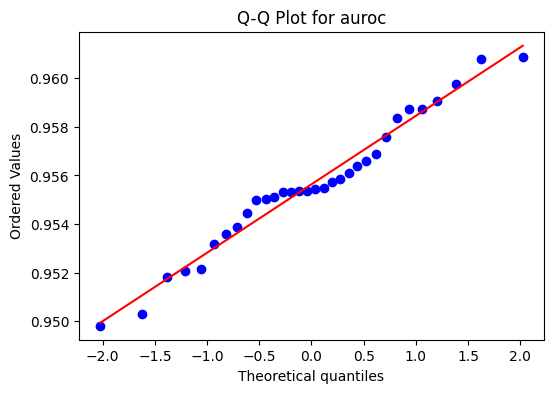


Metric: balanced_acc
              Shapiro-Wilk Statistic  p-value
balanced_acc                0.944721  0.10198
Interpretation: p-value >= 0.05. fail to reject H0 
 data is normally distributed.


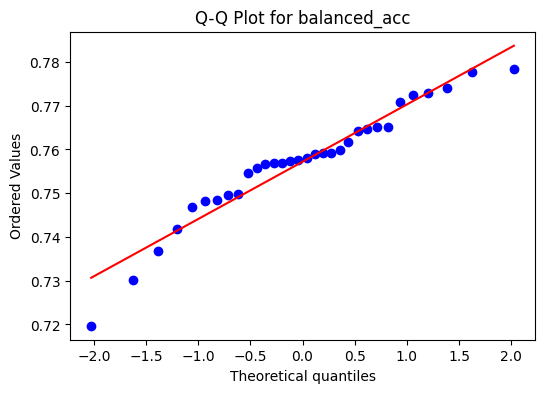


Metric: f1
    Shapiro-Wilk Statistic   p-value
f1                0.911225  0.012105
Interpretation: p-value < 0.05. reject H0 
 data is not normally distributed.


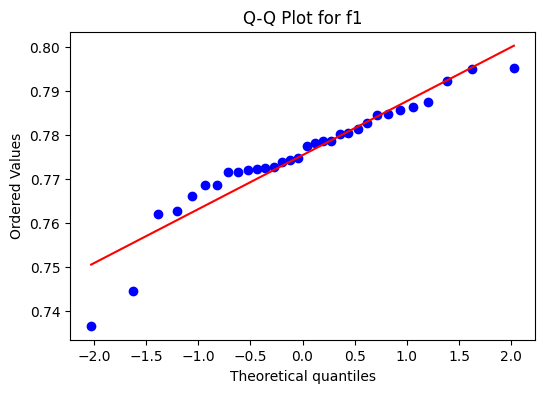


Metric: training_time
               Shapiro-Wilk Statistic       p-value
training_time                0.644295  1.409024e-07
Interpretation: p-value < 0.05. reject H0 
 data is not normally distributed.


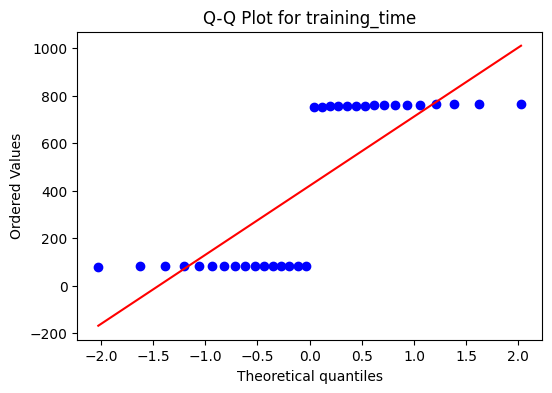


Normality test results for TS2Vec:

Metric: acc
     Shapiro-Wilk Statistic   p-value
acc                0.971499  0.541767
Interpretation: p-value >= 0.05. fail to reject H0 
 data is normally distributed.


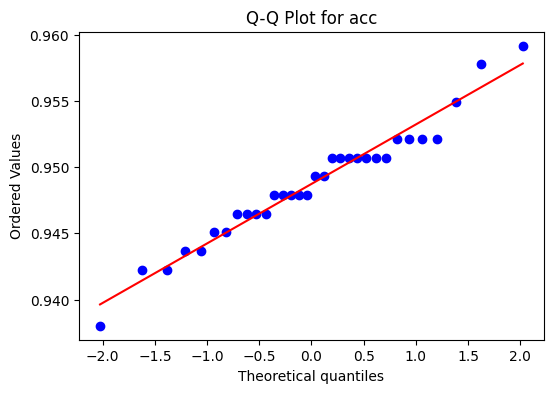


Metric: auprc
       Shapiro-Wilk Statistic   p-value
auprc                0.859594  0.000674
Interpretation: p-value < 0.05. reject H0 
 data is not normally distributed.


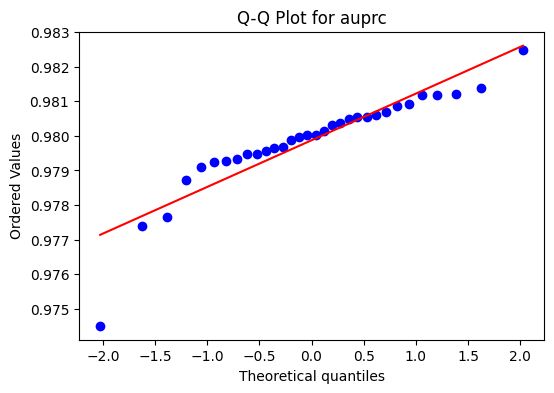


Metric: auroc
       Shapiro-Wilk Statistic   p-value
auroc                0.964587  0.364715
Interpretation: p-value >= 0.05. fail to reject H0 
 data is normally distributed.


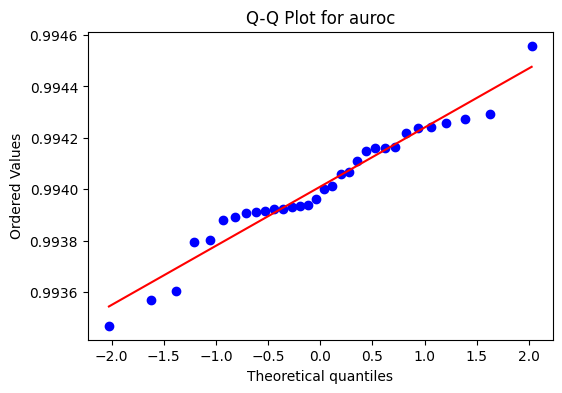


Metric: balanced_acc
              Shapiro-Wilk Statistic   p-value
balanced_acc                0.937982  0.065631
Interpretation: p-value >= 0.05. fail to reject H0 
 data is normally distributed.


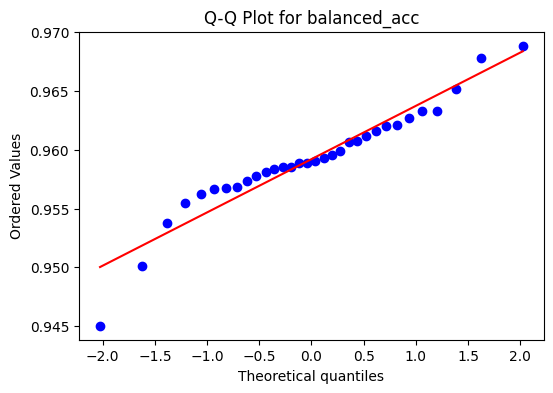


Metric: f1
    Shapiro-Wilk Statistic   p-value
f1                0.972503  0.571157
Interpretation: p-value >= 0.05. fail to reject H0 
 data is normally distributed.


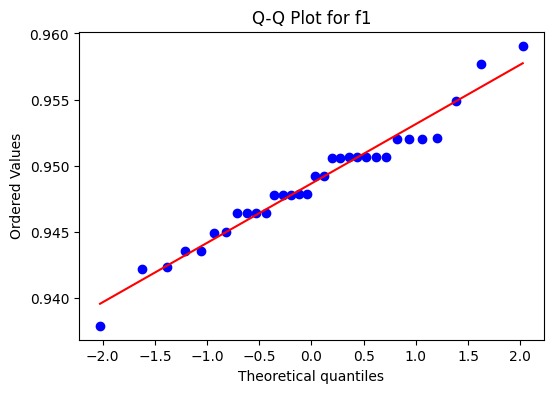


Metric: training_time
               Shapiro-Wilk Statistic       p-value
training_time                0.648599  1.611218e-07
Interpretation: p-value < 0.05. reject H0 
 data is not normally distributed.


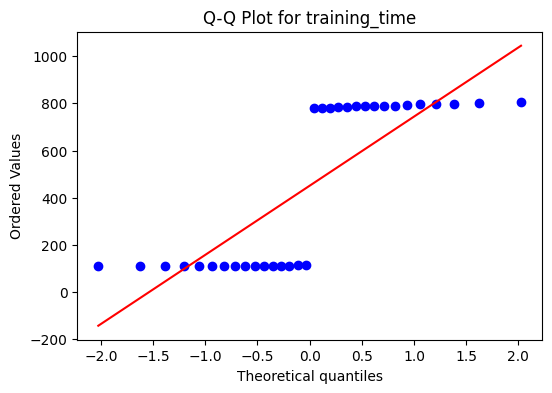

In [19]:
import scipy.stats as stats

# Shapiro-Wilk test - normality
def shapiro_test(df, metric):
    stat, p_value = stats.shapiro(df[metric])
    return pd.DataFrame({
        'Shapiro-Wilk Statistic': [stat],
        'p-value': [p_value]
    }, index=[metric])

def interpret_shapiro(p_value):
    if p_value < 0.05:
        return "p-value < 0.05. reject H0 \n data is not normally distributed."
    else:
        return "p-value >= 0.05. fail to reject H0 \n data is normally distributed."

# create a Q-Q plot
def qq_plot(df, metric):
    plt.figure(figsize=(6, 4))
    stats.probplot(df[metric], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {metric}')
    plt.show()

for encoder in ['RNN', 'TS2Vec']:
    subset = data[data['variant'].str.contains(encoder)]
    print(f"\nNormality test results for {encoder}:")
    for metric in metrics:
        print(f"\nMetric: {metric}")
        # Shapiro-Wilk Test
        shapiro_results = shapiro_test(subset, metric)
        print(shapiro_results)

        # Interpret Shapiro-Wilk Test Results
        p_value = shapiro_results['p-value'].iloc[0]
        interpretation = interpret_shapiro(p_value)
        print(f"Interpretation: {interpretation}")

        # Q-Q Plot
        qq_plot(subset, metric)


Use the Wilcoxon signed-rank test to determine if there are statistically significant differences between the means of the metrics across different encoder types.

In [20]:

metrics = ['acc', 'auprc', 'auroc', 'balanced_acc', 'f1']

# Wilcoxon signed-rank test
def wilcoxon_test(df, metric):
    rnn_values = df[df['variant'].str.contains('RNN')][metric].dropna()
    ts2vec_values = df[df['variant'].str.contains('TS2Vec')][metric].dropna()
    min_len = min(len(rnn_values), len(ts2vec_values))
    if min_len > 0 and len(rnn_values) == len(ts2vec_values):  # Check for pairing
        rnn_values = rnn_values.sample(min_len).reset_index(drop=True)
        ts2vec_values = ts2vec_values.sample(min_len).reset_index(drop=True)
        stat, p_value = stats.wilcoxon(rnn_values, ts2vec_values)
        return pd.DataFrame({'Wilcoxon Statistic': [stat], 'p-value': [p_value]}, index=[metric])
    else:
        return pd.DataFrame({'Wilcoxon Statistic': [None], 'p-value': [None]}, index=[metric])

def interpret_test(p_value):
    if p_value < 0.05:
        return "Yes, there is a significant difference."
    else:
        return "No, there is no significant difference."

results_list = []

# Perform  test for each metric
for metric in metrics:

    wilcoxon_results = wilcoxon_test(data, metric)
    wilcoxon_stat = wilcoxon_results['Wilcoxon Statistic'].iloc[0]
    wilcoxon_p_value = wilcoxon_results['p-value'].iloc[0]
    interpretation_wilcoxon = interpret_test(wilcoxon_p_value)
    
    result = ({
        'Metric': metric,
        'Wilcoxon Statistic': wilcoxon_stat,
        'Wilcoxon p-value': wilcoxon_p_value,
        'Difference (Wilcoxon)': interpretation_wilcoxon
    })

    results_list.append(result)

results_df = pd.DataFrame(results_list)

print("Analysis complete.")

results_df.to_csv('out/wilcoxon_results.csv', index=False)

results_df


Analysis complete.


,Metric,Wilcoxon Statistic,Wilcoxon p-value,Difference (Wilcoxon)
0,acc,0.0,4.656613e-10,"Yes, there is a significant difference."
1,auprc,0.0,4.656613e-10,"Yes, there is a significant difference."
2,auroc,0.0,4.656613e-10,"Yes, there is a significant difference."
3,balanced_acc,0.0,4.656613e-10,"Yes, there is a significant difference."
4,f1,0.0,4.656613e-10,"Yes, there is a significant difference."
